In [1]:
import os
from pathlib import Path
root = Path('/Users/user/Coding/EV-D68-3C-protease/')
os.chdir(root)

In [2]:
from rdkit import Chem

with Chem.SDMolSupplier('filtered_hits.sdf') as sds:
    hitdex = {h.GetProp('_Name'): h for h in sds}

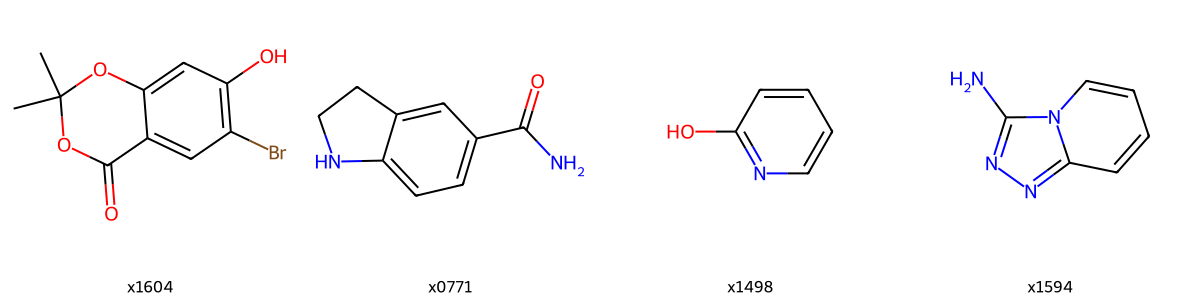

In [5]:
from rdkit.Chem import Draw, AllChem

x1604 = hitdex['x1604L0AP1']
x0771 = hitdex['x0771L1AP1']
x1498 = hitdex['x1498L0BP1']
x1594 = hitdex['x1594L0AP1']

x = *map(Chem.Mol, [x1604, x0771, x1498, x1594]),
*map(AllChem.Compute2DCoords, x),

Draw.MolsToGridImage(x, legends=['x1604', 'x0771', 'x1498', 'x1594'], molsPerRow=4, subImgSize=(300,300))

In [ ]:
import logging
import pyrosetta_help as ph
import pyrosetta

logger = ph.configure_logger()
logger.handlers[0].setLevel(logging.ERROR)  # logging.WARNING = 30
extra_options = ph.make_option_string(no_optH=False,
                                      ex1=None,
                                      ex2=None,
                                      #mute='all',
                                      ignore_unrecognized_res=True,
                                      load_PDB_components=False,
                                      ignore_waters=True)
pyrosetta.init(extra_options=extra_options)


from fragmenstein import Victor, Igor

vicky = Victor([x1594], pdb_filename='reference.pdb')

#ZINC91252472 BBV-79200345 O=C1N=CC=C2C(Br)=NN=C12
#ZINC39193569 EN300-131088 Brc1nnc2ccccn12
#ZINC34320189 BBV-79236296 c1cc2c3c(cccc3c1)N=N2

summaries = []
followups = []
for name, smiles in [('ZINC8616242', 'Nc1nnc2ccccn12'), # self
                     ('ZINC91252472', 'O=C1N=CC=C2C(Br)=NN=C12'),
                     ('ZINC39193569', 'Brc1nnc2ccccn12'),
                     ('ZINC34320189', 'c1cc2c3c(cccc3c1)N=N2')]:
    vicky.place(smiles, long_name=name)
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

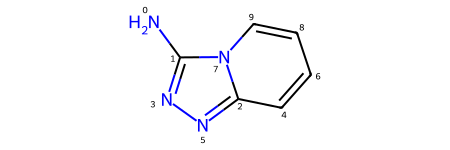

In [12]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True

hit2D = Chem.Mol(x1594)
AllChem.Compute2DCoords(hit2D)
hit2D

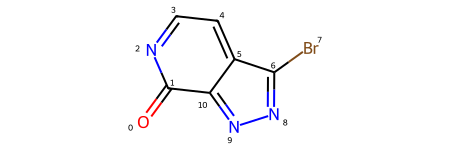

In [9]:
followup = Chem.MolFromSmiles('O=C1N=CC=C2C(Br)=NN=C12')
followup

In [ ]:
for name, smiles in [('ZINC000725593612', 'Cl[C@H]1C=CC2=NN=C(Br)C2=C1'),
                     ('ZINC000725593613', 'Cl[C@@H]1C=CC2=NN=C(Br)C2=C1'),]:
    vicky.place(Chem.MolFromSmiles(smiles),
                long_name=name, custom_map={vicky.hits[0].GetProp('_Name'): {0: 8, 3: 6, 5:5}})
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

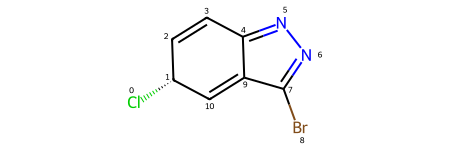

In [30]:
followup = Chem.MolFromSmiles('Cl[C@@H]1C=CC2=NN=C(Br)C2=C1')
followup

In [71]:
vicky.place(followup, long_name='ZINC91252472',
            custom_map={vicky.hits[0].GetProp('_Name'): {0: 8, 3: 6, 5: 5}})
summaries.append(vicky.summarize())
followups.append(vicky.minimized_mol)

ZINC91252472 - Folder output/ZINC91252472 exists.
[16:17:20] Molecule does not have explicit Hs. Consider calling AddHs()
[16:17:20] Molecule does not have explicit Hs. Consider calling AddHs()


In [ ]:
for name, smiles in [('ZINC238664892', 'N[C@H]1N=Nc2ccc(Cl)cc21'),
                     ('ZINC238659177', 'N[C@@H]1N=Nc2ccc(Cl)cc21')]:
    vicky.place(Chem.MolFromSmiles(smiles),
                long_name=name, custom_map={vicky.hits[0].GetProp('_Name'): {0: 0, 3: 2, 5:3}})
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

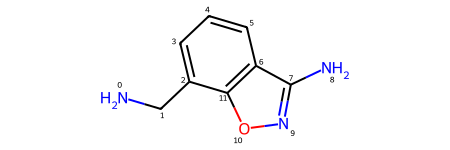

In [26]:
# ZINC307527887
followup = Chem.MolFromSmiles('NCc1cccc2c(N)noc12')
followup # 8, 9, 10

In [70]:
vicky.place(followup, long_name='ZINC307527887', # 'NCc1cccc2c(N)noc12'
            custom_map={vicky.hits[0].GetProp('_Name'): {0: 8, 3: 9, 5: 10}})
summaries.append(vicky.summarize())
followups.append(vicky.minimized_mol)

ZINC307527887 - Folder output/ZINC307527887 exists.
[16:16:53] Molecule does not have explicit Hs. Consider calling AddHs()
[16:16:53] Molecule does not have explicit Hs. Consider calling AddHs()


In [ ]:
for name, smiles in [('ZINC3818469', 'Nc1nsc2ccc(Cl)cc12'),
                    ('ZINC67175723', 'Nc1noc2ccc(Cl)cc12'),
                    ('ZINC299888951', 'Nc1noc2c(O)cccc12'),
                    ('ZINC86492581', 'Nc1noc2c(Cl)cccc12')]:
    vicky.place(Chem.MolFromSmiles(smiles),
                long_name=name, custom_map={vicky.hits[0].GetProp('_Name'): {0: 0, 3: 2, 5:3}})
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

In [ ]:
vicky.place(Chem.MolFromSmiles('Nc1nnc2ccc(Cl)cn12'),
                long_name='ZINC107320578', custom_map={})
summaries.append(vicky.summarize())
followups.append(vicky.minimized_mol)

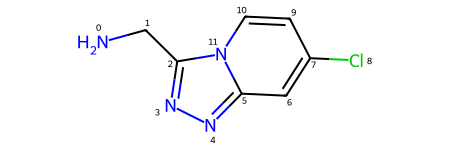

In [65]:
Chem.MolFromSmiles('NCc1nnc2cc(Cl)ccn12')

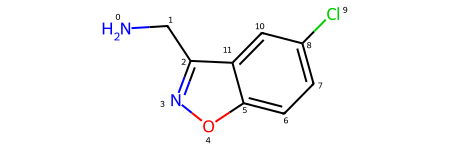

In [86]:
#
IPythonConsole.drawOptions.addAtomIndices = True
Chem.MolFromSmiles()

In [ ]:
#followup # 0, 3, 4
for name, smiles in [('ZINC74377172', 'NCc1nnc2cc(Cl)ccn12'),
                     ('ZINC36240520', 'NCc1nnc2ccc(Cl)cn12'),
                    ('ZINC20221762', 'NCc1noc2ccc(Cl)cc12')]:
    vicky.place(Chem.MolFromSmiles(smiles), long_name=name, # 'NCc1cccc2c(N)noc12'
                custom_map={vicky.hits[0].GetProp('_Name'): {0: 1, 3: 3, 5: 4}})
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

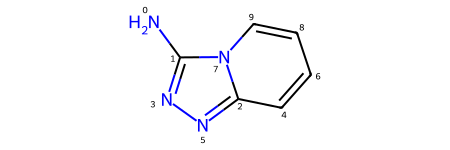

In [64]:
copied = Chem.Mol(vicky.hits[0])
AllChem.Compute2DCoords(copied)
copied

In [89]:
import pandas as pd

data = pd.DataFrame(summaries).drop_duplicates('name', keep='last').set_index('name').sort_values('∆∆G')
data

,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,runtime,regarded,disregarded
name,,,,,,,,,,,,
ZINC299888951,Nc1noc2c(O)cccc12,,expansion,-4.975893,-4.818347,0.157546,0.229329,10,1,1246.791285,[x1594L0AP1],[]
ZINC20221762,NCc1noc2ccc(Cl)cc12,,expansion,-4.758919,-4.691330,0.067589,0.150931,10,2,4432.688346,[x1594L0AP1],[]
ZINC67175723,Nc1noc2ccc(Cl)cc12,,expansion,-4.757616,-4.644932,0.112684,0.109855,10,1,618.525828,[x1594L0AP1],[]
ZINC3818469,Nc1nsc2ccc(Cl)cc12,,expansion,-3.483132,-3.380620,0.102512,0.413080,10,1,613.270744,[x1594L0AP1],[]
ZINC34320189,c1cc2c3c(cccc3c1)N=N2,,expansion,-2.862269,-2.852479,0.009790,0.335070,10,2,18.414891,[x1594L0AP1],[]
ZINC74377172,NCc1nnc2cc(Cl)ccn12,,expansion,-2.714759,-2.569018,0.145741,0.248453,10,2,4421.966820,[x1594L0AP1],[]
ZINC000725593613,Cl[C@@H]1C=CC2=NN=C(Br)C2=C1,,expansion,-2.509732,-2.397386,0.112346,0.482490,10,1,372.159158,[x1594L0AP1],[]
ZINC000725593612,Cl[C@H]1C=CC2=NN=C(Br)C2=C1,,expansion,-2.200525,-2.088182,0.112342,0.491868,10,1,367.596133,[x1594L0AP1],[]
ZINC36240520,NCc1nnc2ccc(Cl)cn12,,expansion,-2.172656,-2.054162,0.118494,0.367815,10,2,4427.164844,[x1594L0AP1],[]


In [95]:
print(data.to_markdown())

| name             | smiles                       | error   | mode      |       ∆∆G |   ∆G_bound |   ∆G_unbound |   comRMSD |   N_constrained_atoms |   N_unconstrained_atoms |    runtime | regarded       | disregarded   |
|:-----------------|:-----------------------------|:--------|:----------|----------:|-----------:|-------------:|----------:|----------------------:|------------------------:|-----------:|:---------------|:--------------|
| ZINC299888951    | Nc1noc2c(O)cccc12            |         | expansion | -4.97589  |  -4.81835  |   0.157546   |  0.229329 |                    10 |                       1 | 1246.79    | ['x1594L0AP1'] | []            |
| ZINC20221762     | NCc1noc2ccc(Cl)cc12          |         | expansion | -4.75892  |  -4.69133  |   0.0675892  |  0.150931 |                    10 |                       2 | 4432.69    | ['x1594L0AP1'] | []            |
| ZINC67175723     | Nc1noc2ccc(Cl)cc12           |         | expansion | -4.75762  |  -4.64493  |   0.112684   

In [90]:
# Any displacement of the trapped water needs to be in a model that known of the water.
# implicit water is silly.

# ZINC8616242 is x1594 itself

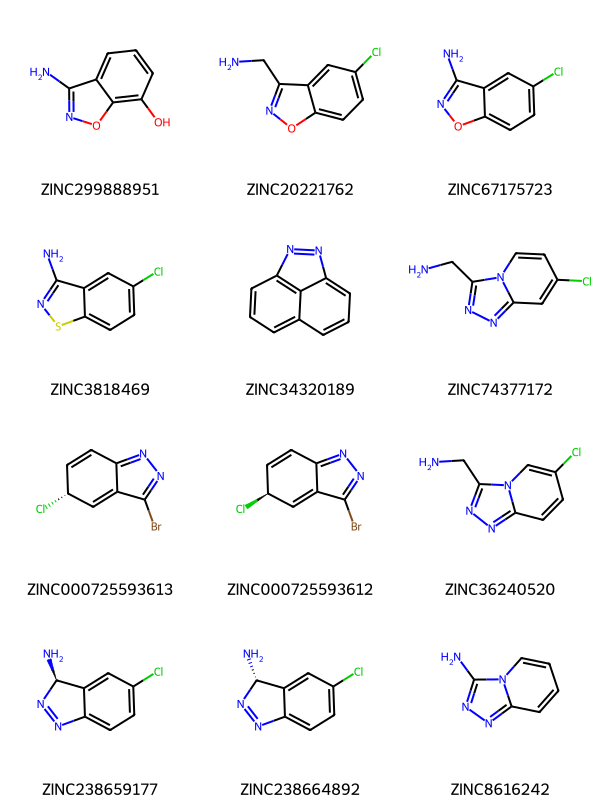

In [101]:
x = data.iloc[:12]
IPythonConsole.drawOptions.addAtomIndices = False
Draw.MolsToGridImage(list(map(Chem.MolFromSmiles, x.smiles)), legends=x.index.to_list())

In [102]:
with open('images/valid-x1594-expansions.png', 'wb') as fh:
    fh.write(_.data)

In [ ]:
import requests


def smiles_to_iupac(smiles: str) -> str:
    rep = "iupac_name"
    CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"
    url = CACTUS.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text

smiles_to_iupac('Nc1nnc2ccccn12')

In [ ]:
from STOUT import translate_forward

translate_forward('c1cc2c3c(cccc3c1)N=N2')

In [23]:
with Chem.SDMolSupplier('of-interest.sdf') as sd:
    for mol in sd:
        hitdex[mol.GetProp('_Name')] = mol
    
with Chem.SDMolSupplier('trimmed_x0771-x1604.sdf') as sd:
    for mol in sd:
        hitdex[mol.GetProp('_Name')] = mol

In [33]:
import logging
import pyrosetta_help as ph
import pyrosetta

logger = ph.configure_logger()
logger.handlers[0].setLevel(logging.ERROR)  # logging.WARNING = 30
extra_options = ph.make_option_string(no_optH=False,
                                      ex1=None,
                                      ex2=None,
                                      #mute='all',
                                      ignore_unrecognized_res=True,
                                      load_PDB_components=False,
                                      ignore_waters=True)
pyrosetta.init(extra_options=extra_options)


from fragmenstein import Victor, Igor

# 
vicky = Victor([hitdex['x1604hydroxyl'], hitdex['x0771_1A§1']],
               pdb_filename='reference.pdb')

PyRosetta-4 2023 [Rosetta PyRosetta4.Release.python310.m1 2023.16+release.942c01d5066fd96860b7d268702b832fe906a739 2023-04-12T15:05:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [31]:
summaries = []
followups = []
for name, smiles in [('Z2568145378', 'CC1=C(CN[C@@H]2CCCC[C@H]2O)OC=C1'), # self
                     ('Z4483406730', 'N2=C(CN[C@@H]1CCC[C@@H](O)[C@H]1O)SC=C2C3=CC=CC=C3'),
                    ]:
    vicky.place(smiles, long_name=name)
    summaries.append(vicky.summarize())
    followups.append(vicky.minimized_mol)

Z2568145378 - Folder output/Z2568145378 exists.
[11:55:46] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:46] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:48] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:48] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:50] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:50] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:53] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:53] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:55] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:55] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:56] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:56] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:58] Molecule does not have explicit Hs. Consider calling AddHs()
[11:55:58] Molec

In [32]:
import pandas as pd

pd.DataFrame(summaries)[['name', '∆∆G', 'comRMSD']]

,name,∆∆G,comRMSD
0,Z2568145378,33.568624,2.249799
1,Z4483406730,97.038329,9.465300


In [ ]:
followups